In [0]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/lab8_partial.zip

--2020-05-21 14:54:32--  https://fmi-unibuc-ia.github.io/ia/Data/lab8_partial.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733250 (716K) [application/zip]
Saving to: ‘lab8_partial.zip’

lab8_partial.zip    100%[===================>] 716.06K  --.-KB/s    in 0.1s    

2020-05-21 14:54:32 (6.87 MB/s) - ‘lab8_partial.zip’ saved [733250/733250]



In [0]:
!unzip lab8_partial.zip

Archive:  lab8_partial.zip
  inflating: data/3d-points/x_test.txt  
  inflating: data/3d-points/x_train.txt  
  inflating: data/3d-points/y_test.txt  
  inflating: data/3d-points/y_train.txt  
  inflating: data/MNIST/test_images.txt  
  inflating: data/MNIST/test_labels.txt  
  inflating: data/MNIST/train_images.txt  
  inflating: data/MNIST/train_labels.txt  
  inflating: lab8_partial.ipynb      
  inflating: lab8_partial.py         


In [0]:
X_train = np.loadtxt('data/3d-points/x_train.txt')
X_test = np.loadtxt('data/3d-points/x_test.txt')
y_train = np.loadtxt('data/3d-points/y_train.txt')
y_test = np.loadtxt('data/3d-points/y_test.txt')

In [0]:
from sklearn.linear_model import Perceptron

clf = Perceptron(eta0=0.1, early_stopping=True, tol=1e-5)

In [0]:
clf.fit(X_train, y_train)
print("Number of training epochs:", clf.n_iter_)

Number of training epochs: 6


In [0]:
clf.score(X_test, y_test)

0.92

In [0]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def plot3d_data_and_decision_function(X, y, W, b):
    ax = plt.axes(projection='3d')
    # create x,y
    xx, yy = np.meshgrid(range(10), range(10))
    # calculate corresponding z
    # [x, y, z] * [W[0], W[1], W[2]] + b = 0
    zz = (-W[0] * xx - W[1] * yy - b) / W[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r');
    plt.show()

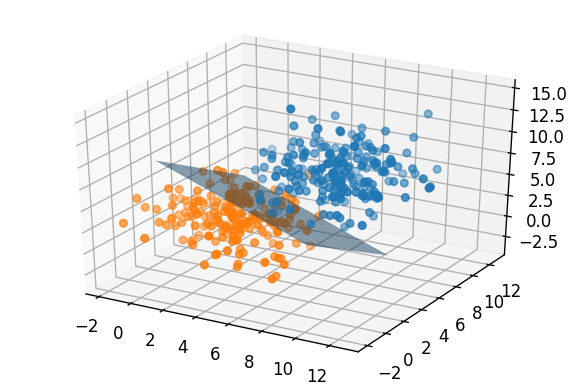

In [0]:
plt.figure(dpi=120)
plot3d_data_and_decision_function(X_test, y_test, clf.coef_[0], clf.intercept_)

In [0]:
Antrenati o retea de perceptroni care sa clasifice cifrele scrise de mana
MNIST. Datele trebuie normalizate prin scaderea mediei si impartirea la deviatia
standard. 

Antrenati si testati urmatoarele configuratii de retele:

a. Functia de activare ‘tanh’, hidden_layer_sizes=(1),
learning_rate_init=0.01, momentum=0 (nu vom folosi momentum),
max_iter=200 (default)
b. Functia de activare ‘tanh’, hidden_layer_sizes=(10),
learning_rate_init=0.01, momentum=0 (nu vom folosi momentum),
max_iter=200 (default)
c. Functia de activare ‘tanh’, hidden_layer_sizes=(10),
learning_rate_init=0.00001, momentum=0 (nu vom folosi momentum),
max_iter=200 (default)
d. Functia de activare ‘tanh’, hidden_layer_sizes=(10),
learning_rate_init=10, momentum=0 (nu vom folosi momentum),
max_iter=200 (default)
e. Functia de activare ‘tanh’, hidden_layer_sizes=(10),
learning_rate_init=0.01, momentum=0 (nu vom folosi momentum),
max_iters=20

In [0]:
X_train = np.loadtxt('data/MNIST/train_images.txt')
X_test = np.loadtxt('data/MNIST/test_images.txt')
y_train = np.loadtxt('data/MNIST/train_labels.txt')
y_test = np.loadtxt('data/MNIST/test_labels.txt')

In [0]:
from sklearn.neural_network import MLPClassifier

def train_and_eval(clf):
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(1), activation='tanh',
                    learning_rate_init=0.01, momentum=0)
train_and_eval(clf)

0.104

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(10), activation='tanh',
                    learning_rate_init=0.01, momentum=0)
train_and_eval(clf)

0.182

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(10), activation='tanh',
                    learning_rate_init=0.00001, momentum=0)
train_and_eval(clf)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.122

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(10), activation='tanh',
                    learning_rate_init=10, momentum=0)
train_and_eval(clf)

0.108

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(10), activation='tanh',
                    learning_rate_init=0.01, momentum=0,
                    max_iter=20)
train_and_eval(clf)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.53

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='tanh',
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
train_and_eval(clf)

0.44

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu',
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
train_and_eval(clf)

0.104

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',
                    learning_rate_init=0.01, momentum=0,
                    max_iter=2000)
train_and_eval(clf)

0.874

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',
                    learning_rate_init=0.01, momentum=0.9,
                    max_iter=2000)
train_and_eval(clf)

0.818

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',
                    learning_rate_init=0.01, momentum=0.9,
                    max_iter=2000, alpha=0.005)
train_and_eval(clf)

0.83